In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os

In [2]:
df=pd.read_csv('Stock.csv')
df

,date,open,high,low,close,volume,average,barCount
0,2019-08-07 14:30:00,133.80,133.83,131.82,132.89,35647,132.701,17523
1,2019-08-07 15:00:00,132.87,135.20,132.64,134.75,48757,134.043,26974
2,2019-08-07 16:00:00,134.74,134.92,133.52,133.88,28977,134.147,17853
3,2019-08-07 17:00:00,133.89,134.06,133.07,133.90,21670,133.618,13497
4,2019-08-07 18:00:00,133.89,135.24,133.83,134.83,22648,134.653,12602
...,...,...,...,...,...,...,...,...
1748,2020-08-04 18:00:00,212.13,213.15,211.76,212.99,27210,212.572,13294
1749,2020-08-04 19:00:00,213.01,213.21,211.13,211.97,32968,212.084,18230
1750,2020-08-04 20:00:00,211.97,213.37,211.25,213.35,51797,212.261,28991
1751,2020-08-05 14:30:00,214.89,215.00,212.07,214.19,44975,213.543,20045


In [3]:
date=df['date']
print(date)
closing_prices=df['close']
print(closing_prices)

0       2019-08-07 14:30:00
1       2019-08-07 15:00:00
2       2019-08-07 16:00:00
3       2019-08-07 17:00:00
4       2019-08-07 18:00:00
               ...         
1748    2020-08-04 18:00:00
1749    2020-08-04 19:00:00
1750    2020-08-04 20:00:00
1751    2020-08-05 14:30:00
1752    2020-08-05 15:00:00
Name: date, Length: 1753, dtype: object
0       132.89
1       134.75
2       133.88
3       133.90
4       134.83
         ...  
1748    212.99
1749    211.97
1750    213.35
1751    214.19
1752    213.64
Name: close, Length: 1753, dtype: float64


In [4]:
df=df.set_index('date')
df

,open,high,low,close,volume,average,barCount
date,,,,,,,
2019-08-07 14:30:00,133.80,133.83,131.82,132.89,35647,132.701,17523
2019-08-07 15:00:00,132.87,135.20,132.64,134.75,48757,134.043,26974
2019-08-07 16:00:00,134.74,134.92,133.52,133.88,28977,134.147,17853
2019-08-07 17:00:00,133.89,134.06,133.07,133.90,21670,133.618,13497
2019-08-07 18:00:00,133.89,135.24,133.83,134.83,22648,134.653,12602
...,...,...,...,...,...,...,...
2020-08-04 18:00:00,212.13,213.15,211.76,212.99,27210,212.572,13294
2020-08-04 19:00:00,213.01,213.21,211.13,211.97,32968,212.084,18230
2020-08-04 20:00:00,211.97,213.37,211.25,213.35,51797,212.261,28991


#We only need the closing price

In [5]:
df=df[['close']]
df

,close
date,
2019-08-07 14:30:00,132.89
2019-08-07 15:00:00,134.75
2019-08-07 16:00:00,133.88
2019-08-07 17:00:00,133.90
2019-08-07 18:00:00,134.83
...,...
2020-08-04 18:00:00,212.99
2020-08-04 19:00:00,211.97
2020-08-04 20:00:00,213.35


Text(0.5, 1.0, 'Microsoft Stock Price(Aug 2019-Aug 2020)')

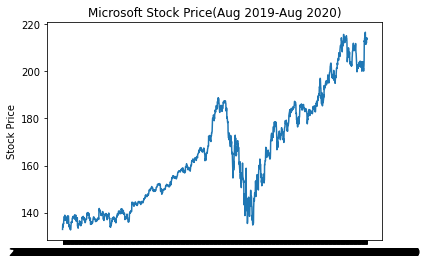

In [6]:
plt.figure()
plt.plot(df.close)
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price(Aug 2019-Aug 2020)')


In [7]:
df['returns']=df['close'].pct_change()
df

C:\Users\nsriw\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,close,returns
date,,
2019-08-07 14:30:00,132.89,NaN
2019-08-07 15:00:00,134.75,0.013997
2019-08-07 16:00:00,133.88,-0.006456
2019-08-07 17:00:00,133.90,0.000149
2019-08-07 18:00:00,134.83,0.006945
...,...,...
2020-08-04 18:00:00,212.99,0.004054
2020-08-04 19:00:00,211.97,-0.004789
2020-08-04 20:00:00,213.35,0.006510


In [8]:
df['log_returns']=np.log(1+df['returns'])
df

C:\Users\nsriw\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,close,returns,log_returns
date,,,
2019-08-07 14:30:00,132.89,NaN,NaN
2019-08-07 15:00:00,134.75,0.013997,0.013899
2019-08-07 16:00:00,133.88,-0.006456,-0.006477
2019-08-07 17:00:00,133.90,0.000149,0.000149
2019-08-07 18:00:00,134.83,0.006945,0.006921
...,...,...,...
2020-08-04 18:00:00,212.99,0.004054,0.004046
2020-08-04 19:00:00,211.97,-0.004789,-0.004800
2020-08-04 20:00:00,213.35,0.006510,0.006489


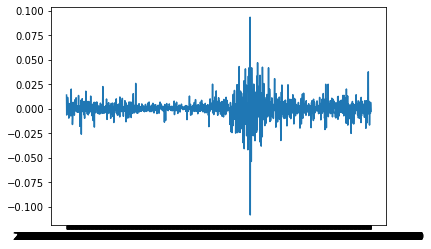

In [9]:
plt.figure()
plt.plot(df.log_returns)




#We notice that the mean of the log_returns is much more stable as compared to that of the actual closing prices

In [10]:
df.dropna(inplace=True)

C:\Users\nsriw\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
X=df[['close','log_returns']]
X[:10]

,close,log_returns
date,,
2019-08-07 15:00:00,134.75,0.013899
2019-08-07 16:00:00,133.88,-0.006477
2019-08-07 17:00:00,133.90,0.000149
2019-08-07 18:00:00,134.83,0.006921
2019-08-07 19:00:00,135.48,0.004809
2019-08-07 20:00:00,135.28,-0.001477
2019-08-08 14:30:00,136.85,0.011539
2019-08-08 15:00:00,137.81,0.006990
2019-08-08 16:00:00,138.25,0.003188


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler(feature_range=(0,1)).fit(X)
X_scaled=scaler.transform(X)

In [14]:
X_scaled[:10]
X_scaled.shape

(1752, 2)

#Min Max Scaler is used to normalize both the feature values to values between 0 and 1

In [15]:
Y=[x[0] for x in X_scaled]
Y[:10]

[0.024800286157148133,
 0.014427089543340932,
 0.014665553833313805,
 0.025754143317038736,
 0.033504232741147,
 0.03111958984142138,
 0.049839036604268694,
 0.06128532252295238,
 0.06653153690234914,
 0.06748539406223952]

In [16]:
split=int(len(X_scaled)*0.8)
print(split)

1401


In [17]:
x_train=X_scaled[:split]
x_test=X_scaled[split:len(X_scaled)]
y_train=Y[:split]
y_test=Y[split:len(Y)]

In [18]:
x_train.shape[1]
x_train[0]

array([0.02480029, 0.6063657 ])

In [19]:
time_step=3
x_train_step=[]
x_test_step=[]
y_train_step=[]
y_test_step=[]
for i in range(time_step,len(x_train)):
    x_train_step.append(x_train[i-time_step:i,:x_train.shape[1]])
    y_train_step.append(y_train[i])
for i in range(time_step,len(x_test)):
    x_test_step.append(x_test[i-time_step:i,:x_test.shape[1]])
    y_test_step.append(y_test[i])
    

# As we are going to use an LSTM model we need to define a timestep i.e the no:of steps from the past (memory) we want the LSTM to use while making prediction at t+1

In [20]:
x_train_step[0]

array([[0.02480029, 0.6063657 ],
       [0.01442709, 0.50534309],
       [0.01466555, 0.53819647]])

In [21]:
y_train[0]

0.024800286157148133

In [22]:
x_train_step=np.array(x_train_step)
y_train_step=np.array(y_train_step)
x_test_step=np.array(x_test_step)
y_test_step=np.array(y_test_step)

In [23]:

# x_train_step=np.reshape(x_train_step,(x_train_step[0],x_train_step[1],x_train_step[2]))
# x_test_step=np.reshape(x_test_step,(x_test_step[0],x_test_step[1],x_test_step[2]))

In [24]:
print(x_train_step.shape)
print(x_test_step.shape)
print(y_train_step.shape)
print(y_test_step.shape)

(1398, 3, 2)
(348, 3, 2)
(1398,)
(348,)


In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [48]:
model=Sequential([LSTM(4,input_shape=(x_train_step.shape[1],x_train_step.shape[2]),return_sequences=True),
                  LSTM((4),return_sequences=False),                 
                  Dense(1)])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 3, 4)              112       
_________________________________________________________________
lstm_3 (LSTM)                (None, 4)                 144       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [59]:
hist=model.fit(x_train_step,y_train_step,epochs=400,validation_data=(x_test_step,y_test_step),batch_size=16,verbose=1)

Train on 1398 samples, validate on 348 samples
Epoch 1/400
1398/1398 [==============================] - 1s 742us/sample - loss: 2.7888e-04 - val_loss: 0.0021
Epoch 2/400
1398/1398 [==============================] - 1s 727us/sample - loss: 2.6562e-04 - val_loss: 0.0016
Epoch 3/400
1398/1398 [==============================] - 1s 725us/sample - loss: 2.7109e-04 - val_loss: 0.0022
Epoch 4/400
1398/1398 [==============================] - 1s 718us/sample - loss: 2.7098e-04 - val_loss: 0.0030
Epoch 5/400
1398/1398 [==============================] - 1s 760us/sample - loss: 2.7734e-04 - val_loss: 0.0012
Epoch 6/400
1398/1398 [==============================] - 1s 732us/sample - loss: 2.7290e-04 - val_loss: 0.0018
Epoch 7/400
1398/1398 [==============================] - 1s 803us/sample - loss: 2.7363e-04 - val_loss: 0.0016
Epoch 8/400
1398/1398 [==============================] - 1s 776us/sample - loss: 2.8692e-04 - val_loss: 0.0020
Epoch 9/400
1398/1398 [==============================] - 1s 801us

Epoch 74/400
1398/1398 [==============================] - 1s 501us/sample - loss: 2.9510e-04 - val_loss: 0.0014
Epoch 75/400
1398/1398 [==============================] - 1s 467us/sample - loss: 2.7181e-04 - val_loss: 0.0016
Epoch 76/400
1398/1398 [==============================] - 1s 437us/sample - loss: 2.7495e-04 - val_loss: 0.0019
Epoch 77/400
1398/1398 [==============================] - 1s 509us/sample - loss: 2.6908e-04 - val_loss: 0.0020
Epoch 78/400
1398/1398 [==============================] - 1s 469us/sample - loss: 2.6967e-04 - val_loss: 0.0021
Epoch 79/400
1398/1398 [==============================] - 1s 437us/sample - loss: 2.7072e-04 - val_loss: 0.0023
Epoch 80/400
1398/1398 [==============================] - 1s 479us/sample - loss: 2.7316e-04 - val_loss: 0.0027
Epoch 81/400
1398/1398 [==============================] - 1s 481us/sample - loss: 2.8933e-04 - val_loss: 0.0019
Epoch 82/400
1398/1398 [==============================] - 1s 482us/sample - loss: 2.6979e-04 - val_loss:

1398/1398 [==============================] - 1s 448us/sample - loss: 2.6562e-04 - val_loss: 0.0016
Epoch 147/400
1398/1398 [==============================] - 1s 482us/sample - loss: 2.6502e-04 - val_loss: 0.0012
Epoch 148/400
1398/1398 [==============================] - 1s 491us/sample - loss: 2.6830e-04 - val_loss: 0.0011
Epoch 149/400
1398/1398 [==============================] - 1s 433us/sample - loss: 2.7454e-04 - val_loss: 0.0012
Epoch 150/400
1398/1398 [==============================] - 1s 442us/sample - loss: 2.6188e-04 - val_loss: 0.0011
Epoch 151/400
1398/1398 [==============================] - 1s 446us/sample - loss: 2.6763e-04 - val_loss: 0.0010
Epoch 152/400
1398/1398 [==============================] - 1s 435us/sample - loss: 2.7816e-04 - val_loss: 0.0018
Epoch 153/400
1398/1398 [==============================] - 1s 441us/sample - loss: 2.7442e-04 - val_loss: 0.0023
Epoch 154/400
1398/1398 [==============================] - 1s 504us/sample - loss: 2.8788e-04 - val_loss: 0.00

1398/1398 [==============================] - 1s 456us/sample - loss: 2.7094e-04 - val_loss: 0.0020
Epoch 219/400
1398/1398 [==============================] - 1s 464us/sample - loss: 2.7781e-04 - val_loss: 9.2525e-04
Epoch 220/400
1398/1398 [==============================] - 1s 436us/sample - loss: 2.7102e-04 - val_loss: 8.3387e-04
Epoch 221/400
1398/1398 [==============================] - 1s 438us/sample - loss: 2.6930e-04 - val_loss: 0.0012
Epoch 222/400
1398/1398 [==============================] - 1s 441us/sample - loss: 2.7176e-04 - val_loss: 9.1634e-04
Epoch 223/400
1398/1398 [==============================] - 1s 436us/sample - loss: 2.7140e-04 - val_loss: 0.0010
Epoch 224/400
1398/1398 [==============================] - 1s 442us/sample - loss: 2.7194e-04 - val_loss: 0.0012
Epoch 225/400
1398/1398 [==============================] - 1s 445us/sample - loss: 2.6932e-04 - val_loss: 0.0012
Epoch 226/400
1398/1398 [==============================] - 1s 552us/sample - loss: 2.7666e-04 - va

1398/1398 [==============================] - 1s 491us/sample - loss: 2.6791e-04 - val_loss: 0.0010
Epoch 290/400
1398/1398 [==============================] - 1s 433us/sample - loss: 2.6814e-04 - val_loss: 8.4586e-04
Epoch 291/400
1398/1398 [==============================] - 1s 441us/sample - loss: 2.7201e-04 - val_loss: 0.0016
Epoch 292/400
1398/1398 [==============================] - 1s 479us/sample - loss: 2.6757e-04 - val_loss: 9.9423e-04
Epoch 293/400
1398/1398 [==============================] - 1s 443us/sample - loss: 2.6447e-04 - val_loss: 0.0013
Epoch 294/400
1398/1398 [==============================] - 1s 444us/sample - loss: 2.6471e-04 - val_loss: 8.4974e-04
Epoch 295/400
1398/1398 [==============================] - 1s 493us/sample - loss: 2.6563e-04 - val_loss: 9.1330e-04
Epoch 296/400
1398/1398 [==============================] - 1s 542us/sample - loss: 2.7025e-04 - val_loss: 9.5129e-04
Epoch 297/400
1398/1398 [==============================] - 1s 515us/sample - loss: 2.6704e

1398/1398 [==============================] - 1s 457us/sample - loss: 2.7066e-04 - val_loss: 0.0011
Epoch 361/400
1398/1398 [==============================] - 1s 441us/sample - loss: 2.6302e-04 - val_loss: 0.0012
Epoch 362/400
1398/1398 [==============================] - 1s 562us/sample - loss: 2.7647e-04 - val_loss: 0.0011
Epoch 363/400
1398/1398 [==============================] - 1s 523us/sample - loss: 2.7064e-04 - val_loss: 0.0017
Epoch 364/400
1398/1398 [==============================] - 1s 541us/sample - loss: 2.6701e-04 - val_loss: 8.3058e-04
Epoch 365/400
1398/1398 [==============================] - 1s 568us/sample - loss: 2.6251e-04 - val_loss: 7.5771e-04
Epoch 366/400
1398/1398 [==============================] - 1s 452us/sample - loss: 2.7806e-04 - val_loss: 0.0011
Epoch 367/400
1398/1398 [==============================] - 1s 459us/sample - loss: 2.6336e-04 - val_loss: 0.0011
Epoch 368/400
1398/1398 [==============================] - 1s 485us/sample - loss: 2.6287e-04 - val_lo

In [60]:
predict_train=model.predict(x_train_step)
predict_test=model.predict(x_test_step)
print(predict_test)

[[0.6065004 ]
 [0.60568863]
 [0.6010608 ]
 [0.5898862 ]
 [0.55275756]
 [0.54054743]
 [0.549164  ]
 [0.5667059 ]
 [0.56755584]
 [0.58050656]
 [0.5911641 ]
 [0.58632475]
 [0.594816  ]
 [0.59892243]
 [0.60934854]
 [0.61445   ]
 [0.61326116]
 [0.58992726]
 [0.6009193 ]
 [0.58647734]
 [0.59136206]
 [0.5928382 ]
 [0.5977865 ]
 [0.6094689 ]
 [0.61017597]
 [0.6016504 ]
 [0.59700954]
 [0.5969716 ]
 [0.6012472 ]
 [0.5998019 ]
 [0.5995144 ]
 [0.60298103]
 [0.6007313 ]
 [0.59809476]
 [0.5937707 ]
 [0.5978674 ]
 [0.60850257]
 [0.6128697 ]
 [0.62717754]
 [0.62559193]
 [0.6205249 ]
 [0.6199283 ]
 [0.6185922 ]
 [0.62233245]
 [0.6277077 ]
 [0.63286054]
 [0.63295615]
 [0.62310404]
 [0.61476684]
 [0.6047564 ]
 [0.6096557 ]
 [0.6036471 ]
 [0.6042607 ]
 [0.62436134]
 [0.6310535 ]
 [0.6385996 ]
 [0.6439509 ]
 [0.6429795 ]
 [0.6486748 ]
 [0.65378374]
 [0.63442534]
 [0.6301773 ]
 [0.639628  ]
 [0.650261  ]
 [0.6601055 ]
 [0.6639728 ]
 [0.6672239 ]
 [0.66087586]
 [0.67674166]
 [0.67278093]
 [0.67873716]
 [0.68

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
test_score=mean_squared_error([x[0][0] for x in x_test_step],predict_test,squared=False)
print('RMSE score of test data {}'.format(test_score))


RMSE score of test data 0.027429594964672028


In [63]:
predict_train=np.c_[predict_train,np.zeros(predict_train.shape)]
predict_test=np.c_[predict_test,np.zeros(predict_test.shape)]


#Inverse Transforming to get the real closing value of the stocks

In [64]:
predict_train=scaler.inverse_transform(predict_train)
predict_train=[x[0] for x in predict_train]
predict_test=scaler.inverse_transform(predict_test)
predict_test=[x[0] for x in predict_test]


In [65]:
# plt.figure()
# plt.scatter(date[split:len(date)],y_test)
# plt.scatter(date[split:len(date)],predict_test)
l1=len(date[split+4:])
l2=len(predict_test)
l3=len(closing_prices[split+4:])
print(l1)
print(l2)
print(l3)

348
348
348


In [66]:
print(predict_test)
print(closing_prices[split:])

[183.53718747377397, 183.46910552680492, 183.0809699422121, 182.1437546300888, 179.0297766584158, 178.00571299731732, 178.72838444292546, 180.19962236940862, 180.27090870201587, 181.35708545446397, 182.2509340810776, 181.84505689799786, 182.55722035825252, 182.901624327302, 183.77606167554856, 184.20391964435578, 184.10421376049518, 182.1471989697218, 183.06910221755504, 181.85785444438457, 182.26753589808942, 182.3913421612978, 182.80635259330273, 183.7861547404528, 183.84545837044718, 183.13042046129704, 182.74119008660318, 182.73800569713117, 183.09660194516184, 182.97538518548012, 182.95127480804922, 183.24201906502248, 183.05333524048328, 182.83220763623714, 182.4695471674204, 182.81314129173757, 183.70511027872564, 184.07138005554677, 185.2713799852133, 185.1383954817057, 184.71342195987702, 184.6633865529299, 184.55132803738118, 184.86502289414406, 185.31584645986558, 185.7480136024952, 185.75603206515314, 184.92973548710347, 184.23049454927445, 183.39092051684858, 183.801821736

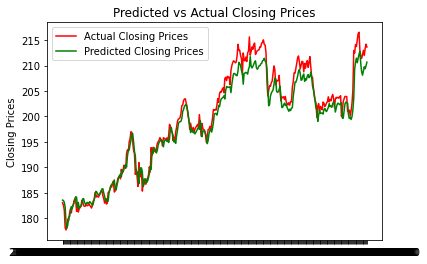

In [67]:
plt.figure()
plt.plot(date[split+4:len(date)],closing_prices[split+4:],color='r',label='Actual Closing Prices')
plt.plot(date[split+4:len(date)],predict_test,color='g',label='Predicted Closing Prices')
plt.title('Predicted vs Actual Closing Prices')
plt.ylabel('Closing Prices')
plt.legend()